## Imports

In [1]:
from pathlib import Path

import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt
from torch.utils.data import random_split
from torchvision import transforms
from torch.utils.data import DataLoader

from src import dataset as dataset_tools, modeling

%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

* Загрузить архив с данными на диск
* Создать датасет
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Попытаться выбить наилучшее качество на тестовом датасете.

## Создать датасет

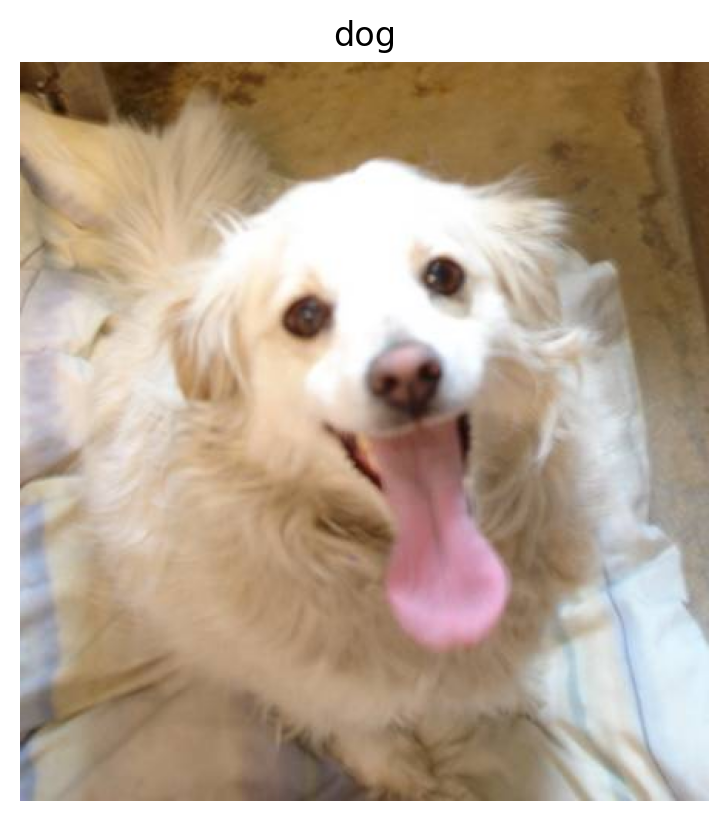

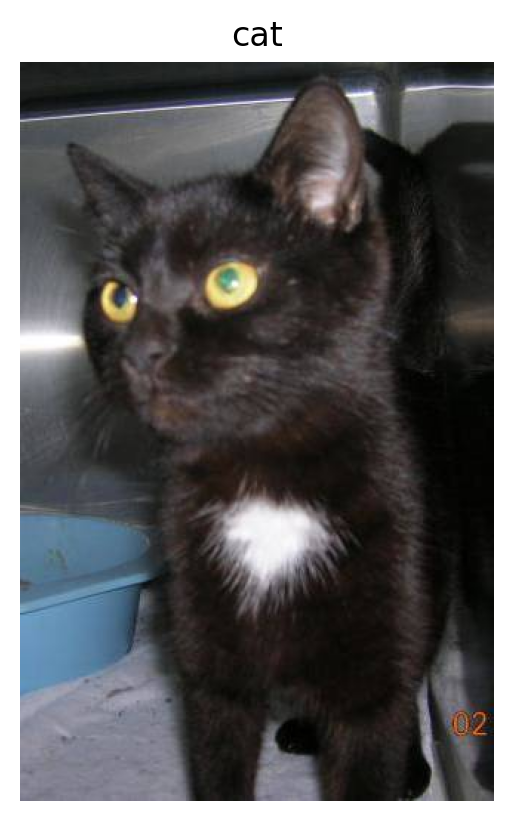

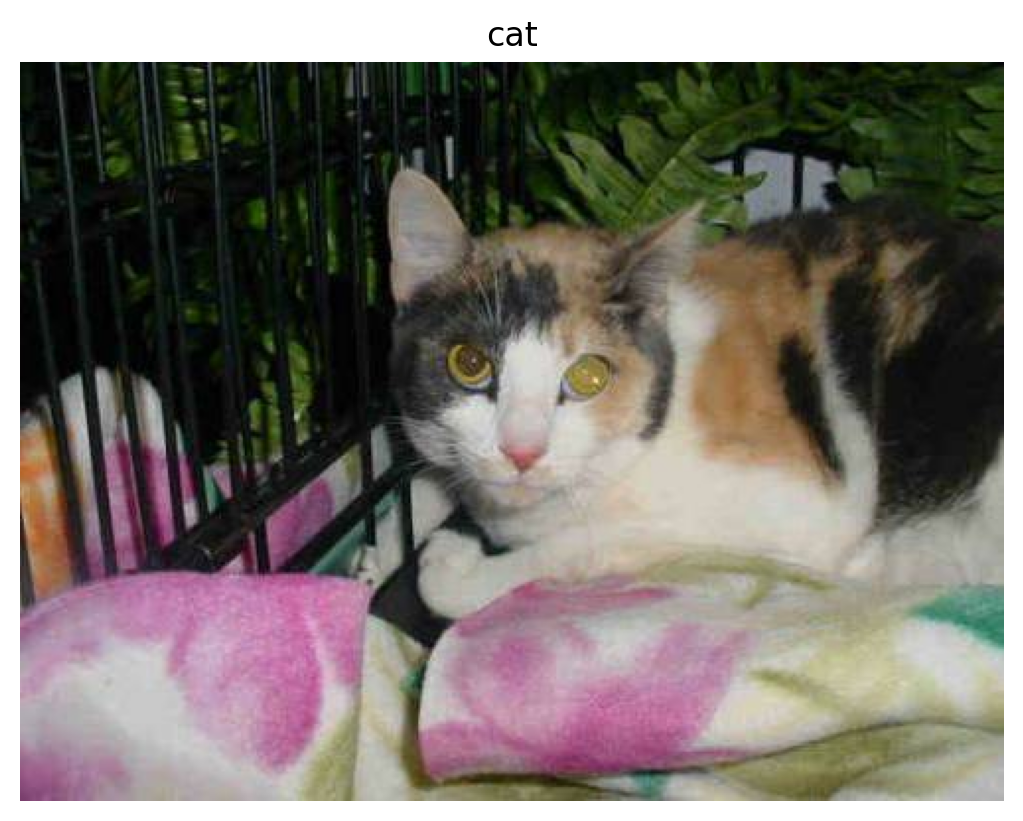

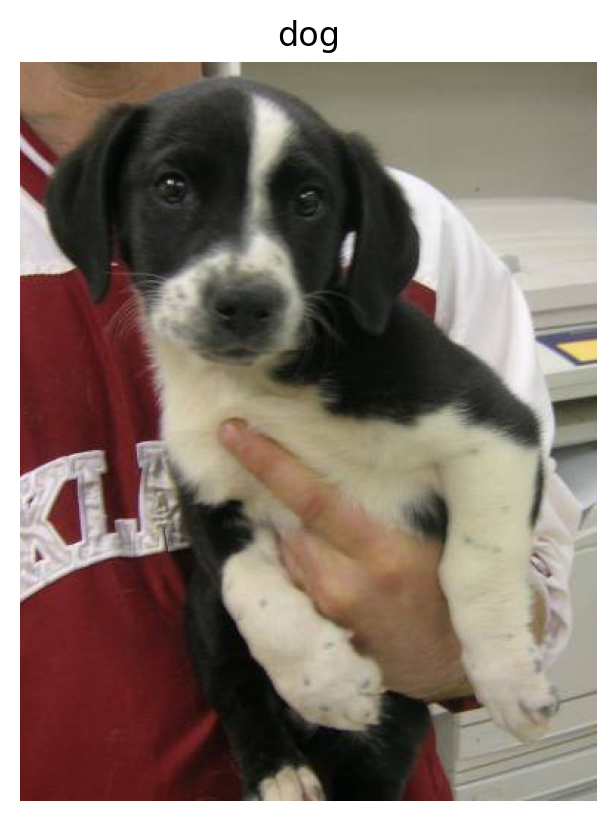

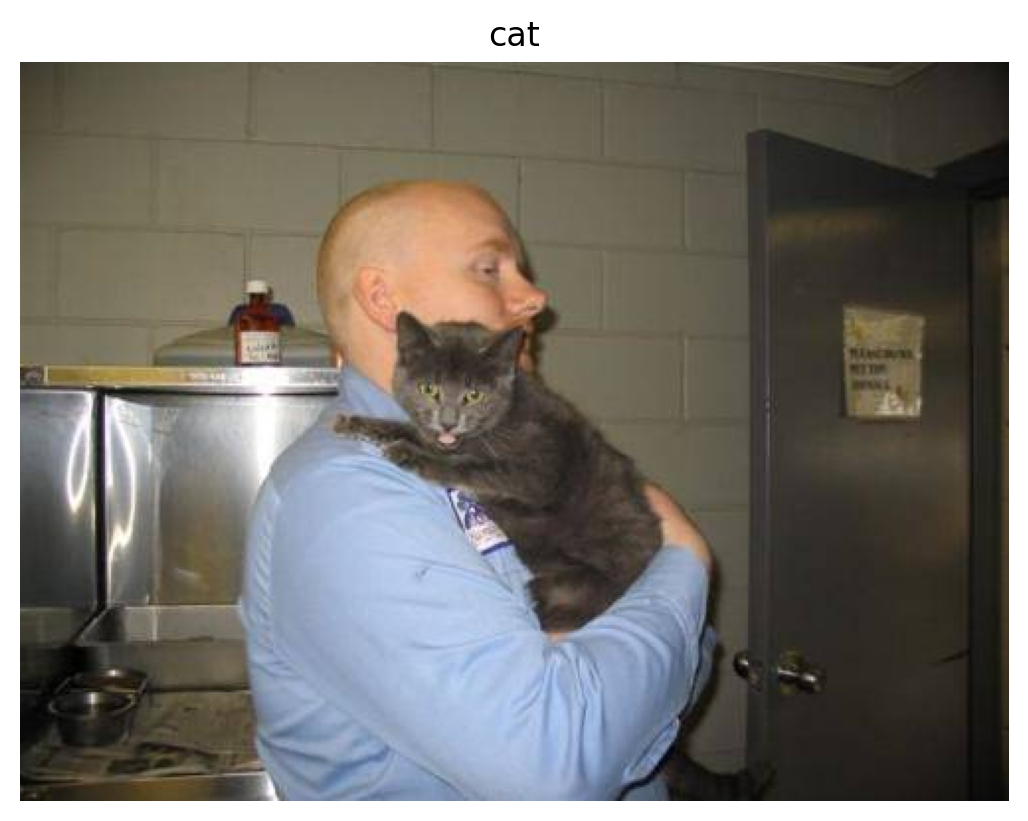

In [2]:
dataset_dir = Path('/Users/user/Downloads/cats_dogs')

# Легче наверное использовать https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
dataset = dataset_tools.CatDogDataset(dataset_dir)

np.random.seed(69)
random_idx = np.random.choice(range(len(dataset)), size=5)

for i in random_idx:
    data = dataset[i]
    image = data['image']
    label = dataset.labels[data['label_idx']]
    
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()

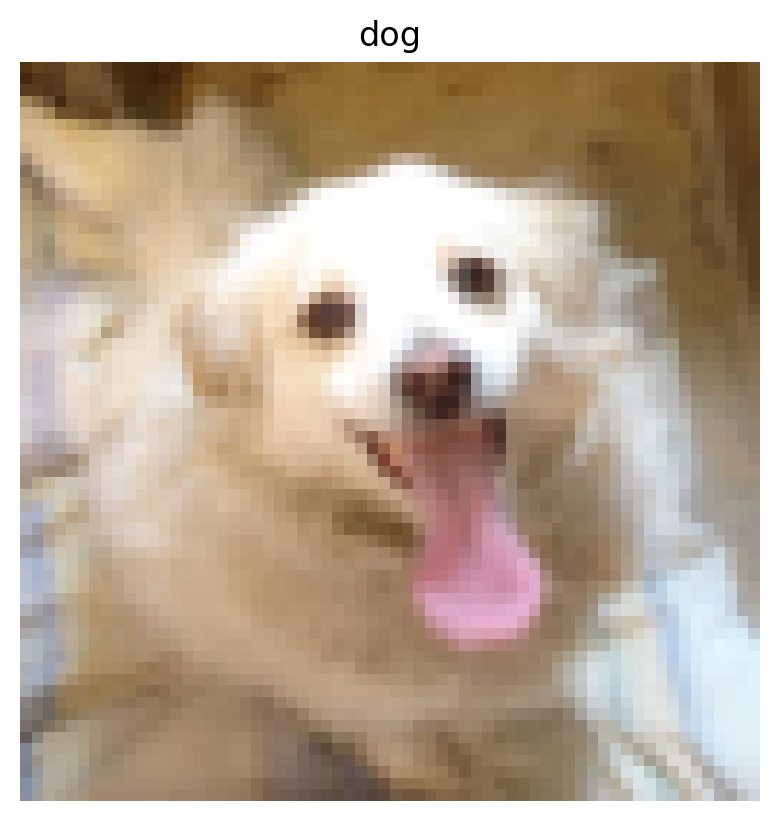

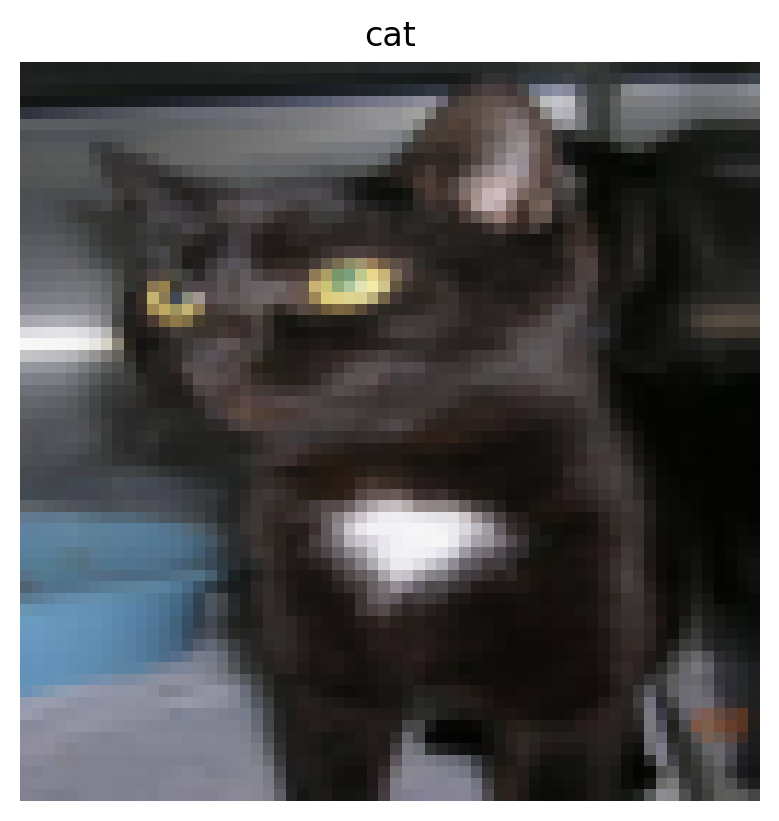

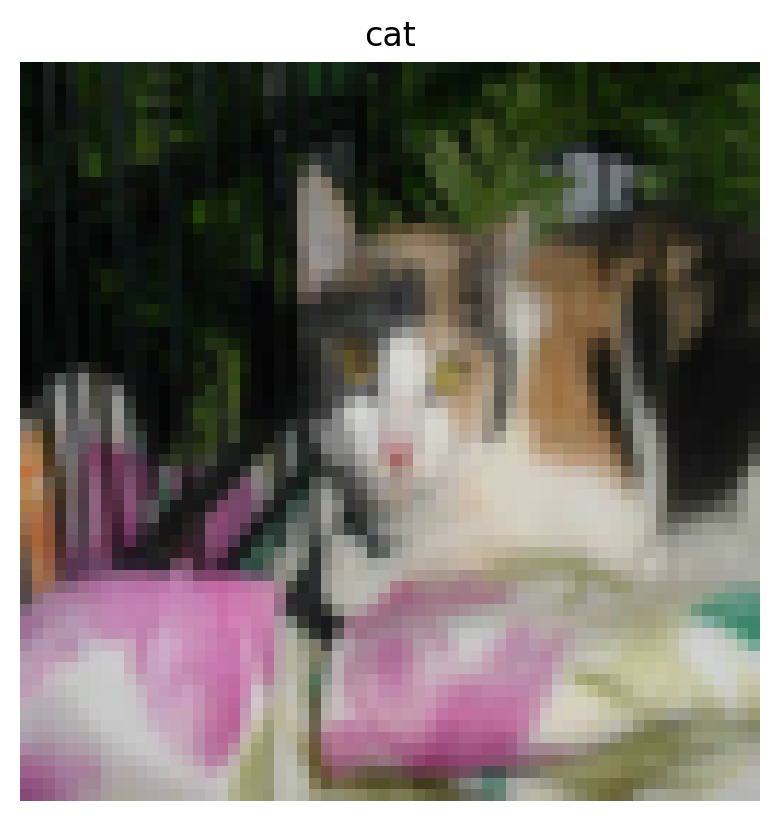

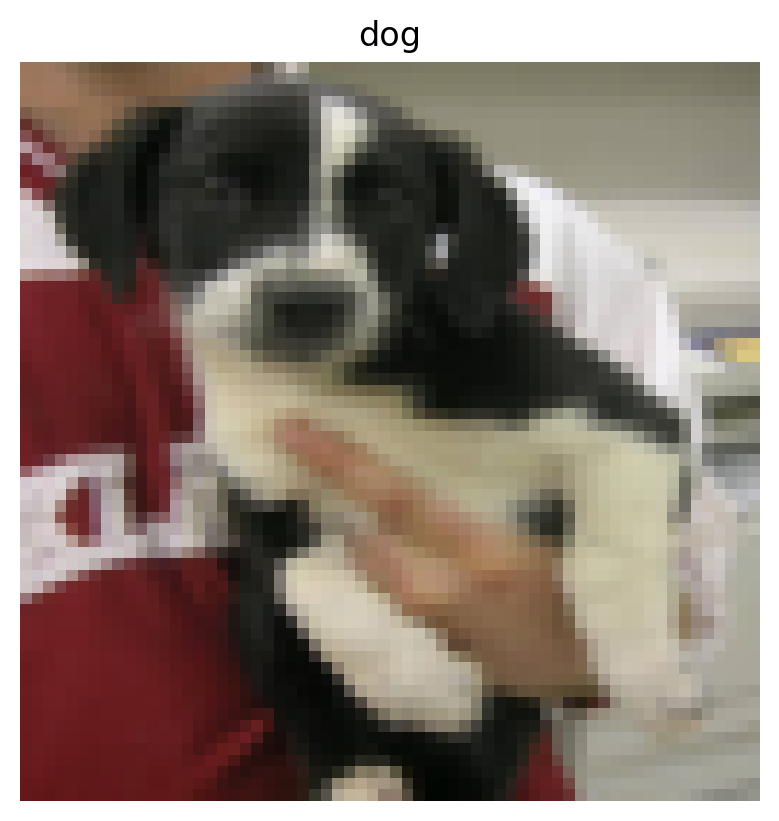

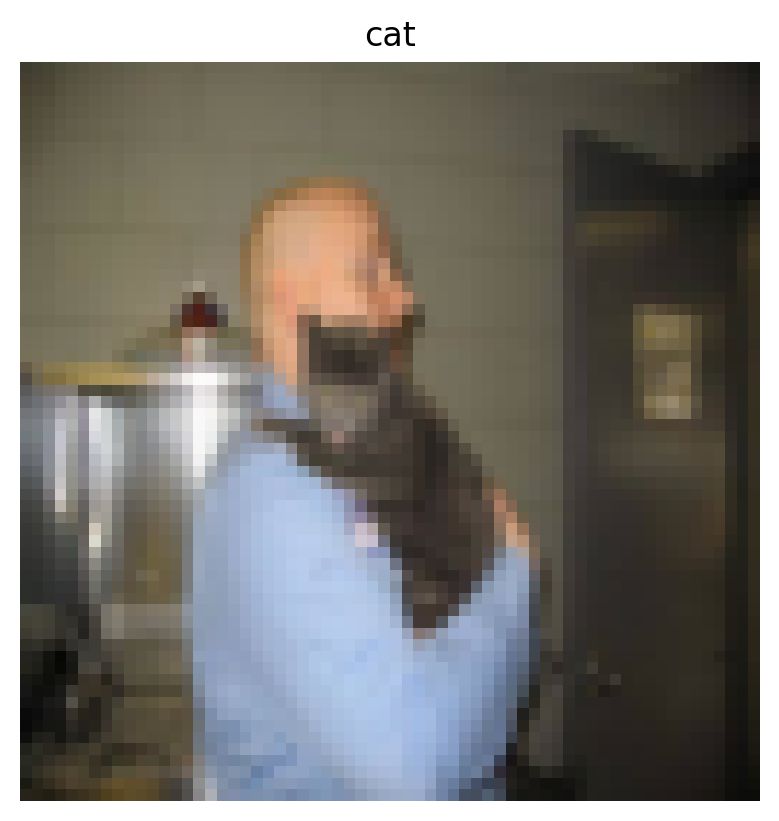

In [3]:
SIZE = (64, 64)

# Для аугментаций можно посмотреть albumentations
transform = transforms.Compose([
    transforms.PILToTensor(),
    transforms.Resize(SIZE),
])

dataset = dataset_tools.CatDogDataset(dataset_dir, transform=transform)

for i in random_idx:
    data = dataset[i]
    image = data['image']
    image = transforms.ToPILImage()(image)
    label = dataset.labels[data['label_idx']]
    
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()

In [4]:
# Табличные данные:
# [batch_size, feature_size]

# Фотки:
# [batch_size, channel_num, width, height]

data['image'].shape

torch.Size([3, 64, 64])

## Обучение

In [30]:
num_classes = len(dataset.labels)
train_dataset, val_dataset = random_split(dataset, [0.8, 0.2])

batch_size = 128

train_loader = DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=batch_size,
)

val_loader = DataLoader(
    val_dataset,
    shuffle=False,
    batch_size=1,
)

model = modeling.LinearCatDogModel(image_size=SIZE, num_classes=num_classes)

lr = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

trainer = modeling.Trainer(
    model,
    optimizer=optimizer,
    criterion=criterion,
    train_loader=train_loader,
    val_loader=val_loader,
)

In [31]:
trainer.train(5)

Training::   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/157 [00:00<?, ?it/s]

Computing metrics:   0%|          | 0/5000 [00:00<?, ?it/s]

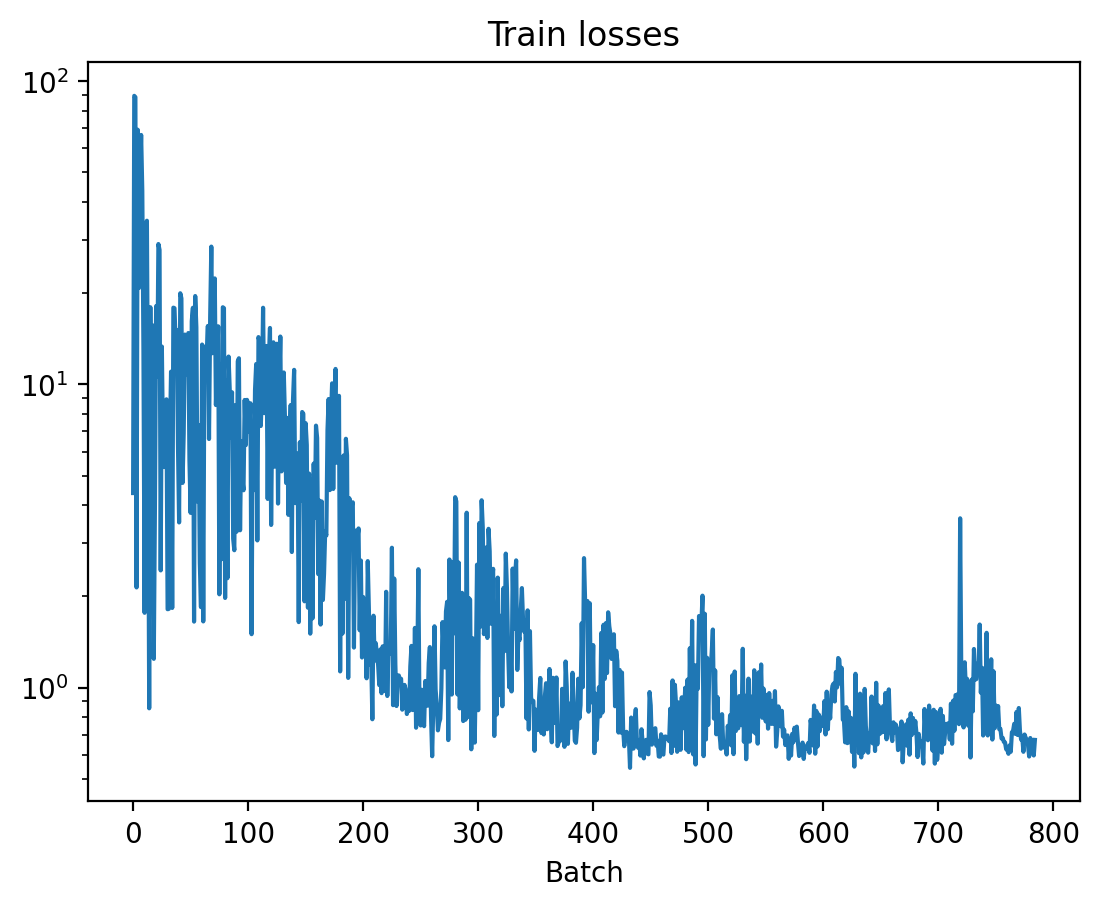

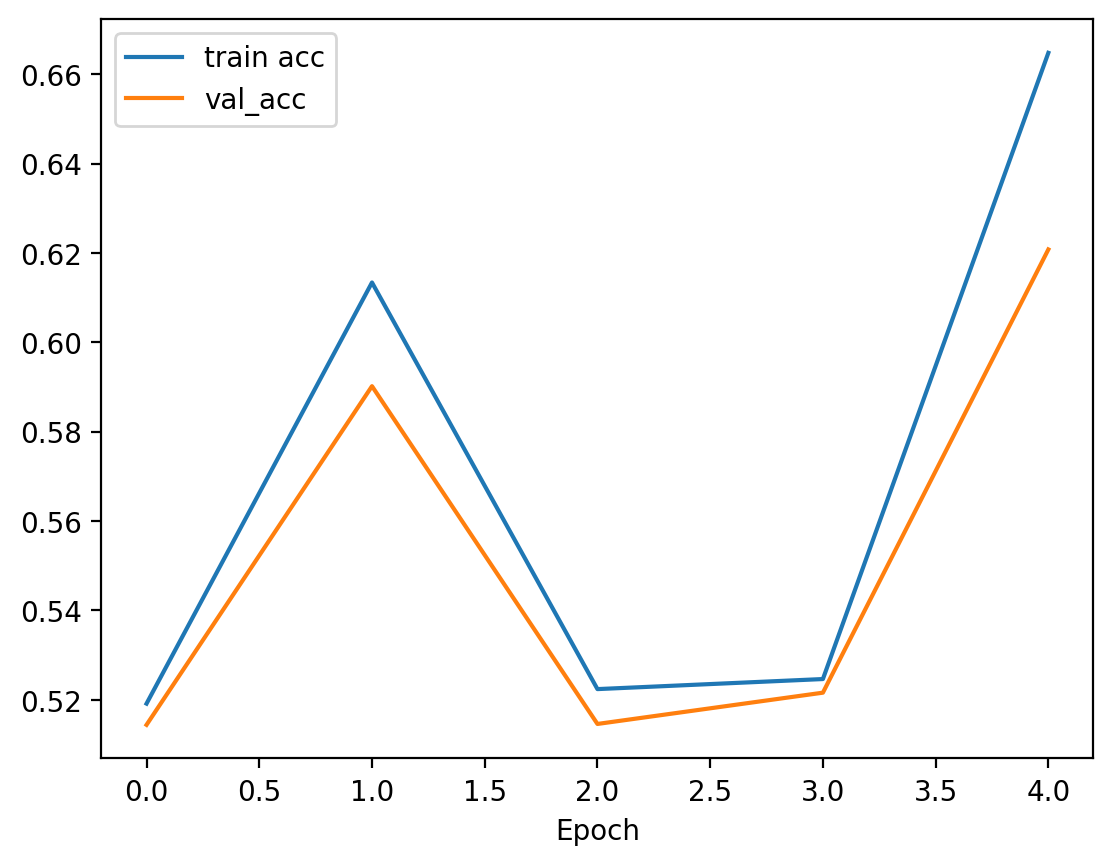

In [33]:
plt.plot(trainer.train_losses)
plt.title('Train losses')
plt.xlabel('Batch')
plt.yscale('log')
plt.show()

plt.plot(trainer.train_accs, label='train acc')
plt.plot(trainer.val_accs, label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()